# Regresión Lineal Múltiple - Análisis de Delitos en La Paz

Este notebook implementa un análisis de regresión lineal múltiple para entender los factores que influyen en la frecuencia y características de los delitos en La Paz.

In [1]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configuración de la visualización
plt.style.use('default')
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)

## Carga y Preparación de Datos

In [2]:
# Importar el dataset
dataset = pd.read_csv('Delitos_LaPaz.csv')

# Convertir las fechas a datetime
dataset['FechaDelito'] = pd.to_datetime(dataset['FechaDelito'])

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(dataset.head())

print("\nInformación del dataset:")
print(dataset.info())

Primeras filas del dataset:


,Edad,TipoDelito,Zona,FechaDelito,HoraDelito,SexoInvolucrado,NivelEducacion,Recurrencia,IngresoMensualEstimado,AñosAntecedentes,VecesCapturado,SospechosoReincidente,RiesgoSocial,Violencia,UsoArma
0,26,Violación,Centro,2024-06-08 22:37:41,06:58:00,Masculino,Secundaria,Ocasional,11375,28,14,No,1,Media,No
1,54,Hurto,San Pedro,2024-04-17 01:37:13,03:16:00,Masculino,Técnico,Ocasional,9440,18,2,Sí,3,Alta,Sí
2,61,Violación,San Pedro,2023-05-30 13:58:18,20:17:00,Masculino,Universitario,Aislado,8465,6,14,No,2,Alta,No
3,39,Asalto,Villa Fátima,2022-12-25 10:58:42,21:16:00,Masculino,Secundaria,Frecuente,4719,20,3,No,5,Media,No
4,44,Violación,Centro,2023-03-26 18:01:08,08:31:00,Femenino,Técnico,Ocasional,8502,6,8,No,2,Media,Sí



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Edad                    911 non-null    int64         
 1   TipoDelito              911 non-null    object        
 2   Zona                    911 non-null    object        
 3   FechaDelito             911 non-null    datetime64[ns]
 4   HoraDelito              911 non-null    object        
 5   SexoInvolucrado         911 non-null    object        
 6   NivelEducacion          911 non-null    object        
 7   Recurrencia             911 non-null    object        
 8   IngresoMensualEstimado  911 non-null    int64         
 9   AñosAntecedentes        911 non-null    int64         
 10  VecesCapturado          911 non-null    int64         
 11  SospechosoReincidente   911 non-null    object        
 12  RiesgoSocial            

## Preprocesamiento de Datos

In [3]:
# Codificar datos categóricos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

# Crear copias de las columnas categóricas para codificación
categorical_columns = ['TipoDelito', 'Zona', 'SexoInvolucrado', 'NivelEducacion', 'Recurrencia', 'Violencia']

# Crear LabelEncoders para cada columna categórica
le_dict = {}
for col in categorical_columns:
    le_dict[col] = LabelEncoder()
    dataset[col + '_encoded'] = le_dict[col].fit_transform(dataset[col])

# Convertir variables binarias a numéricas
dataset['SospechosoReincidente'] = dataset['SospechosoReincidente'].map({'Sí': 1, 'No': 0})
dataset['UsoArma'] = dataset['UsoArma'].map({'Sí': 1, 'No': 0})

# Seleccionar características para el modelo
features = ['Edad', 'IngresoMensualEstimado', 'AñosAntecedentes', 'VecesCapturado', 'RiesgoSocial'] + \
           [col + '_encoded' for col in categorical_columns] + \
           ['SospechosoReincidente', 'UsoArma']

X = dataset[features]
y = dataset['VecesCapturado']  # Variable objetivo

print("Características seleccionadas:")
print(features)

Características seleccionadas:
['Edad', 'IngresoMensualEstimado', 'AñosAntecedentes', 'VecesCapturado', 'RiesgoSocial', 'TipoDelito_encoded', 'Zona_encoded', 'SexoInvolucrado_encoded', 'NivelEducacion_encoded', 'Recurrencia_encoded', 'Violencia_encoded', 'SospechosoReincidente', 'UsoArma']


## Análisis Exploratorio de Datos (EDA)

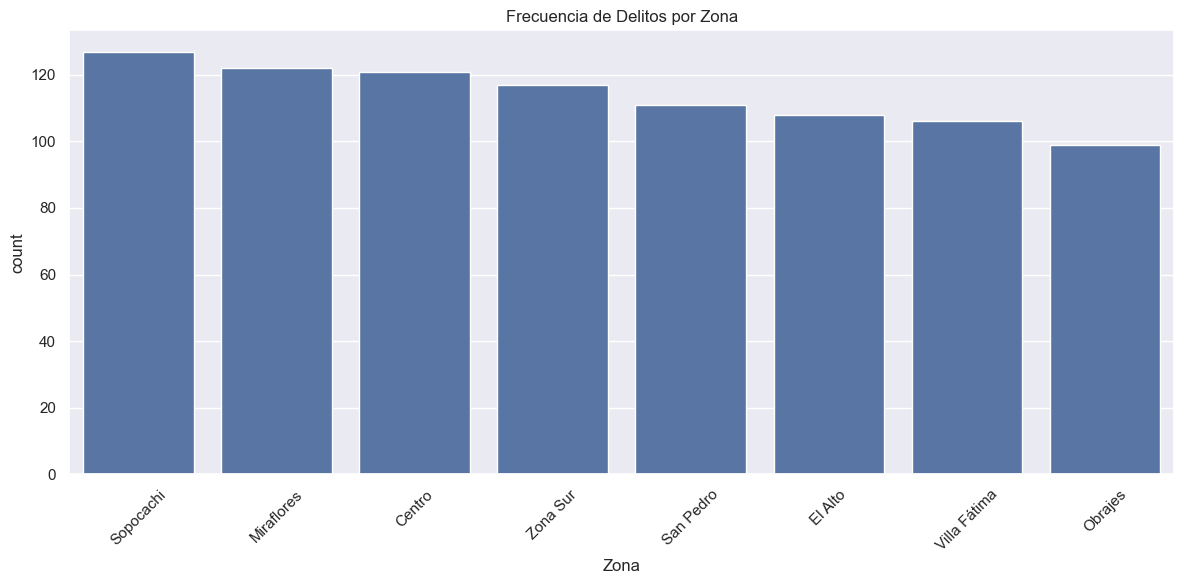

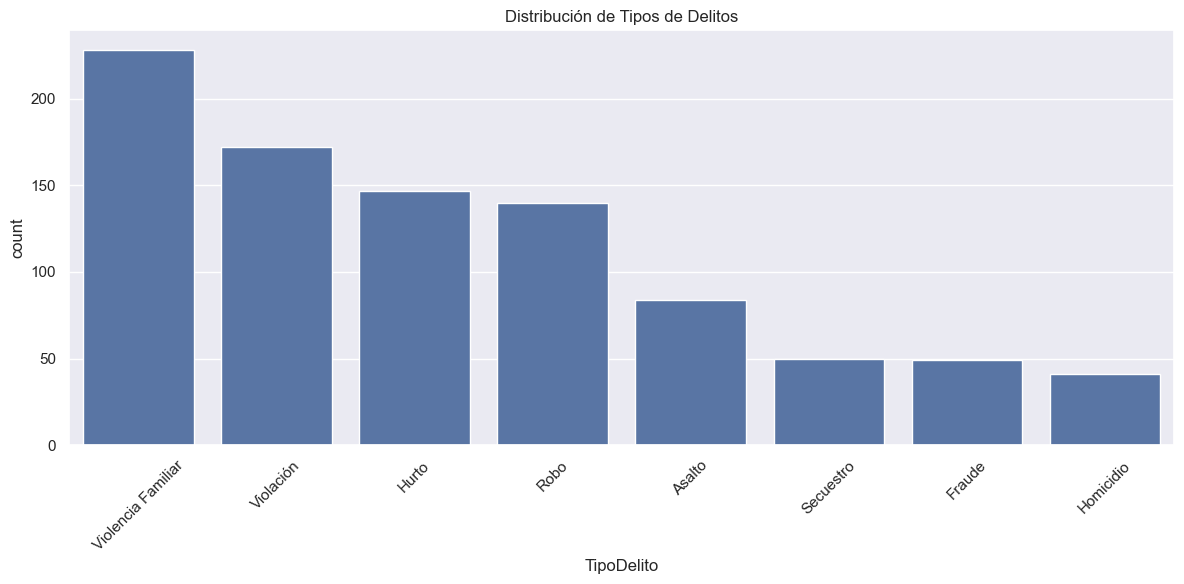

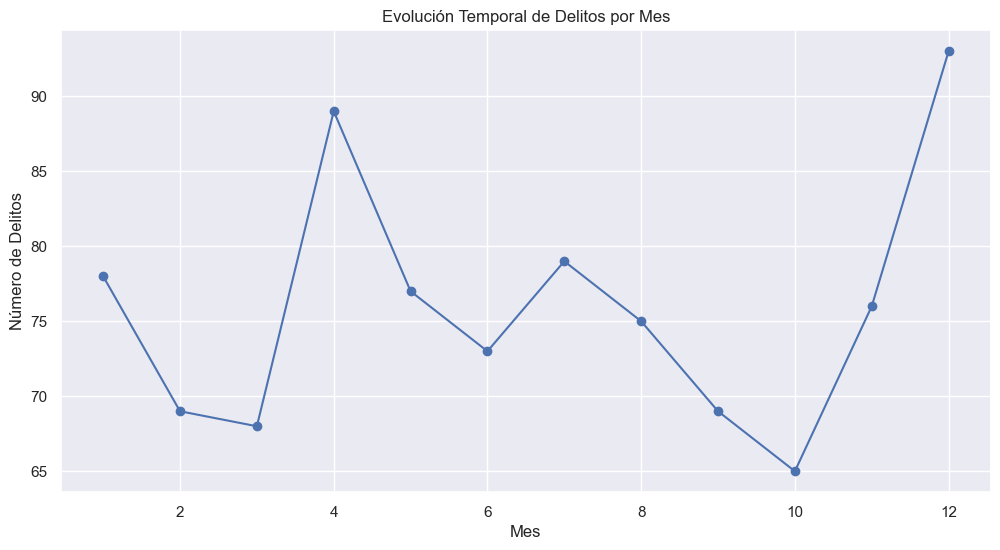

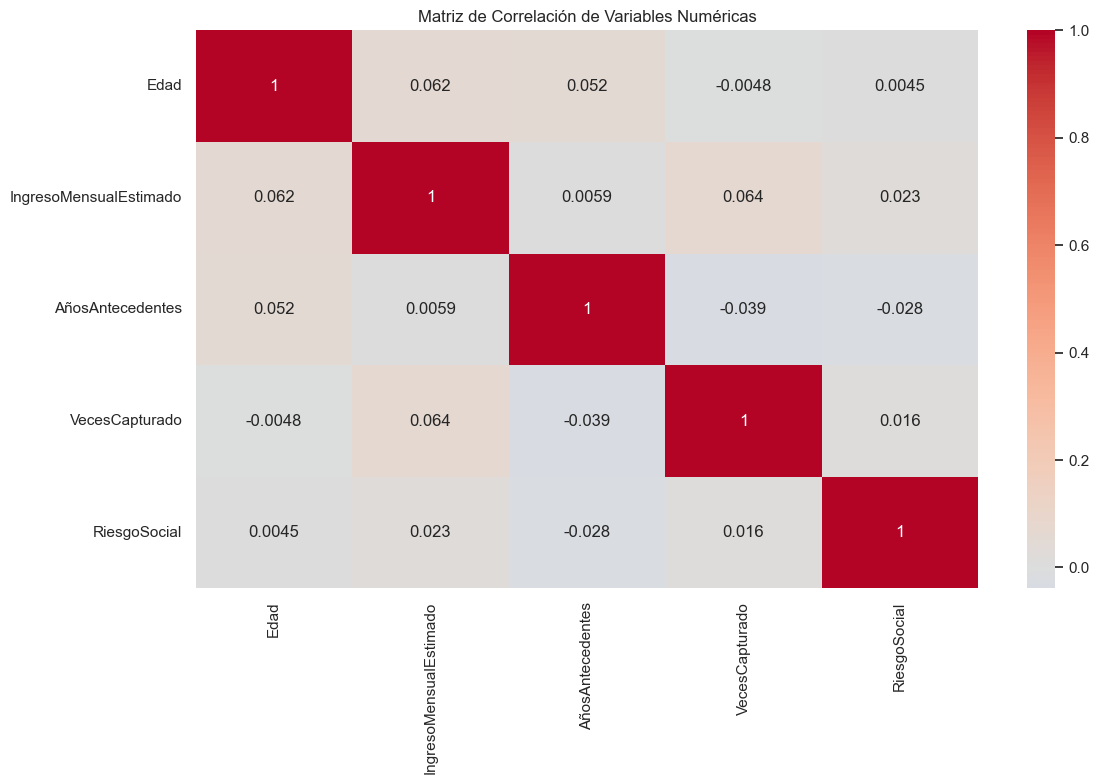

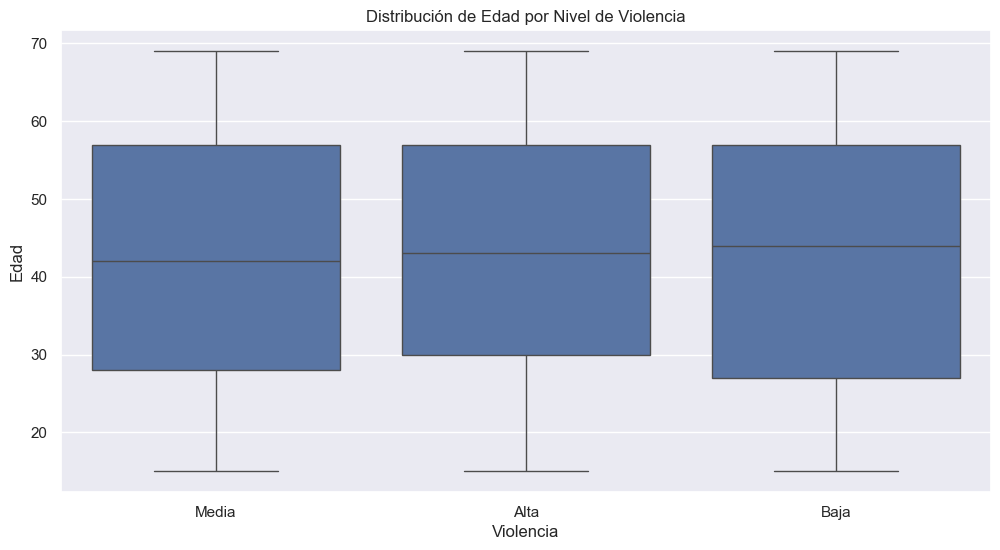

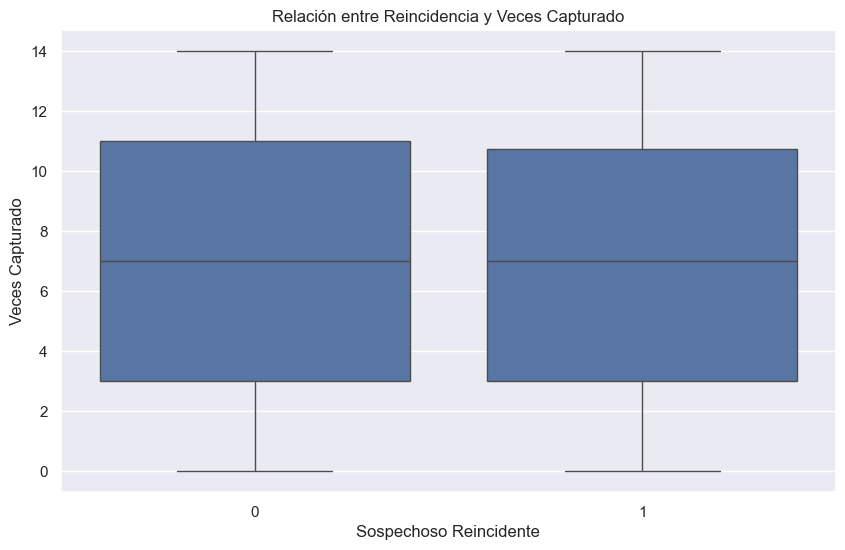

In [4]:
# Análisis de frecuencia de delitos por zona
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Zona', order=dataset['Zona'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Frecuencia de Delitos por Zona')
plt.tight_layout()
plt.show()

# Distribución de tipos de delitos
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='TipoDelito', order=dataset['TipoDelito'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribución de Tipos de Delitos')
plt.tight_layout()
plt.show()

# Análisis temporal de delitos
dataset['Mes'] = dataset['FechaDelito'].dt.month
delitos_por_mes = dataset.groupby('Mes')['TipoDelito'].count()

plt.figure(figsize=(12, 6))
delitos_por_mes.plot(kind='line', marker='o')
plt.title('Evolución Temporal de Delitos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Delitos')
plt.grid(True)
plt.show()

# Relación entre variables numéricas
numeric_cols = ['Edad', 'IngresoMensualEstimado', 'AñosAntecedentes', 'VecesCapturado', 'RiesgoSocial']
plt.figure(figsize=(12, 8))
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

# Análisis por nivel de violencia
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='Violencia', y='Edad')
plt.title('Distribución de Edad por Nivel de Violencia')
plt.show()

# Análisis de reincidencia
# Asegurar que SospechosoReincidente está correctamente codificado
dataset['SospechosoReincidente'] = dataset['SospechosoReincidente'].astype('category')
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='SospechosoReincidente', y='VecesCapturado')
plt.title('Relación entre Reincidencia y Veces Capturado')
plt.xlabel('Sospechoso Reincidente')
plt.ylabel('Veces Capturado')
plt.show()

## División del Dataset y Entrenamiento del Modelo

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)

# Mostrar los coeficientes
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print('Coeficientes del modelo:')
display(coef_df.sort_values(by='Coefficient', ascending=False))

print('\nIntercept:', model.intercept_)

Coeficientes del modelo:


,Feature,Coefficient
3,VecesCapturado,4.344775e+00
10,Violencia_encoded,3.511080e-15
2,AñosAntecedentes,1.353084e-15
12,UsoArma,1.023487e-15
1,IngresoMensualEstimado,8.881784e-16
6,Zona_encoded,4.163336e-17
0,Edad,-2.157614e-16
8,NivelEducacion_encoded,-2.592327e-16
5,TipoDelito_encoded,-3.191891e-16
4,RiesgoSocial,-4.163336e-16



Intercept: 6.9739010989010985


## Optimización del Modelo mediante Eliminación hacia atrás


Resumen del modelo optimizado:
                            OLS Regression Results                            
Dep. Variable:         VecesCapturado   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.476e+31
Date:                Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                        02:53:12   Log-Likelihood:                 28184.
No. Observations:                 911   AIC:                        -5.636e+04
Df Residuals:                     907   BIC:                        -5.634e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.618e-1

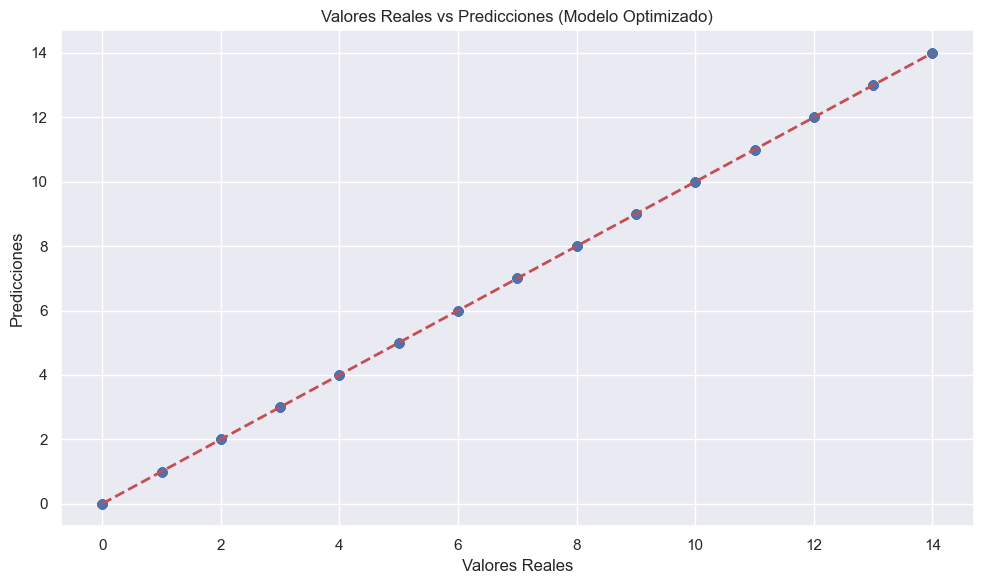

In [6]:
# Construir el modelo óptimo de RLM utilizando la Eliminación hacia atrás
import statsmodels.api as sm
import numpy as np

# Añadir columna de unos para el término independiente
X_with_const = sm.add_constant(X)

# Nivel de significancia
SL = 0.05

def backward_elimination(X, y, sl):
    """
    Implementa eliminación hacia atrás para selección de variables
    X: matriz de características con constante
    y: variable objetivo
    sl: nivel de significancia
    """
    variables = list(range(X.shape[1]))
    
    while True:
        # Ajustar el modelo con las variables actuales
        regressor = sm.OLS(y, X[:, variables]).fit()
        # Encontrar el p-valor máximo
        p_valores = regressor.pvalues
        max_p = p_valores.max()
        
        if max_p > sl:
            # Encontrar el índice de la variable con el p-valor más alto
            excluir = variables[p_valores.argmax()]
            # Eliminar la variable
            variables.remove(excluir)
        else:
            break
            
    return X[:, variables], variables

# Convertir X a array de numpy si no lo es ya
X_array = np.array(X_with_const)

# Aplicar eliminación hacia atrás
X_opt, variables_seleccionadas = backward_elimination(X_array, y, SL)

# Ajustar el modelo final
modelo_final = sm.OLS(y, X_opt).fit()

# Mostrar resultados
print("\nResumen del modelo optimizado:")
print(modelo_final.summary())

# Mostrar las variables seleccionadas
nombres_variables = ['const'] + features
variables_finales = [nombres_variables[i] for i in variables_seleccionadas]
print("\nVariables seleccionadas en el modelo final:")
for var in variables_finales:
    print(f"- {var}")

# Calcular métricas del modelo
r2_ajustado = modelo_final.rsquared_adj
print(f"\nR² ajustado: {r2_ajustado:.4f}")

# Guardar predicciones
y_pred = modelo_final.predict(X_opt)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones (Modelo Optimizado)')
plt.tight_layout()
plt.show()

## Visualización de Resultados Adicionales

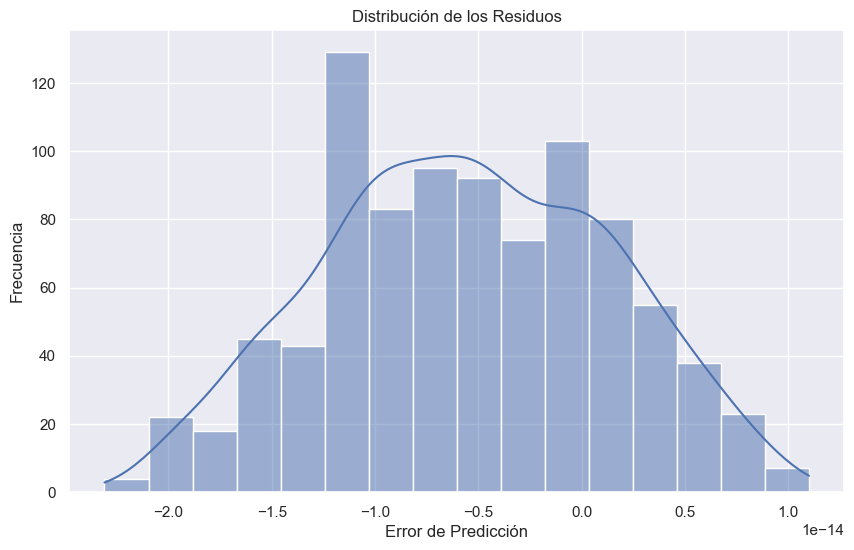

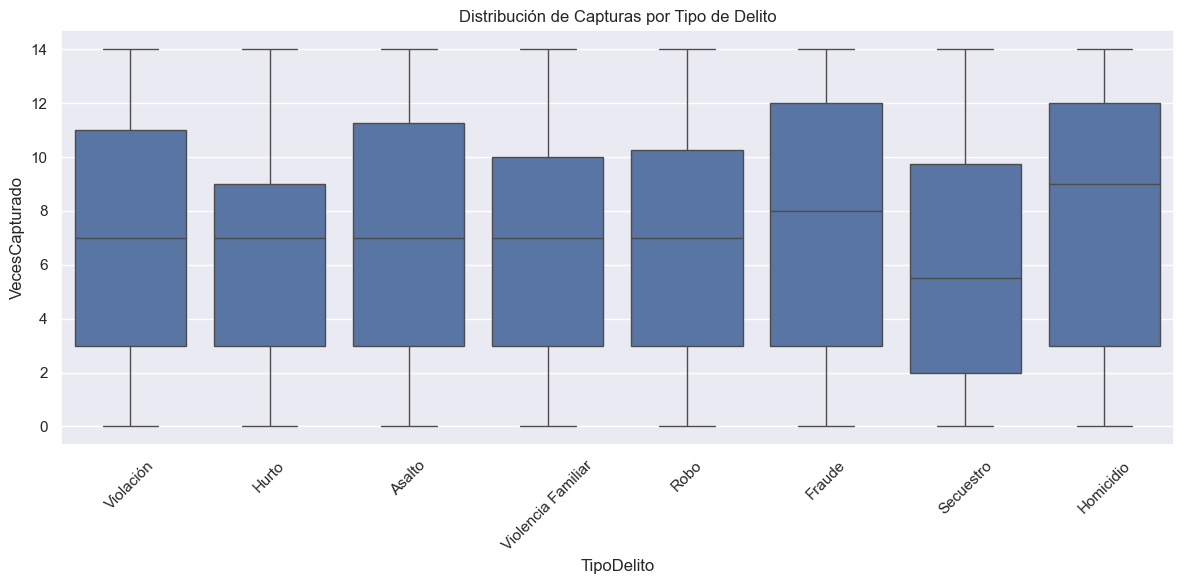

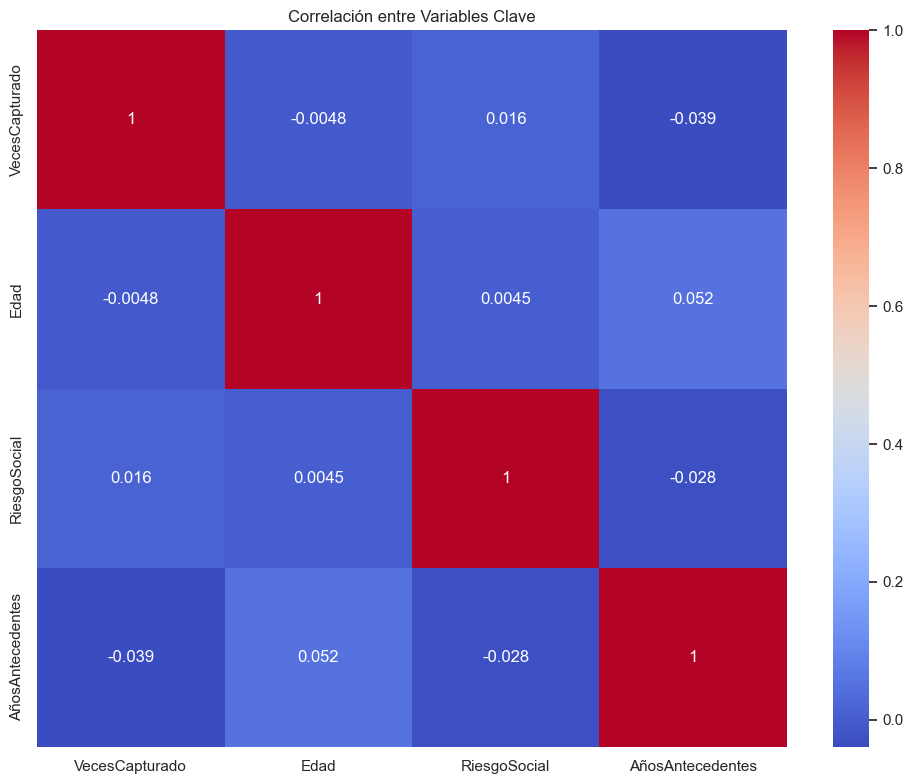

In [7]:
# Análisis adicional de los resultados

# Calcular residuos usando las predicciones del modelo optimizado
residuos = y - y_pred

# Visualizar la distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de los Residuos')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.show()

# Análisis por tipo de delito
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset, x='TipoDelito', y='VecesCapturado')
plt.xticks(rotation=45)
plt.title('Distribución de Capturas por Tipo de Delito')
plt.tight_layout()
plt.show()

# Correlación entre variables clave
variables_clave = ['VecesCapturado', 'Edad', 'RiesgoSocial', 'AñosAntecedentes']
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[variables_clave].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables Clave')
plt.tight_layout()
plt.show()

## Análisis de Características Relevantes

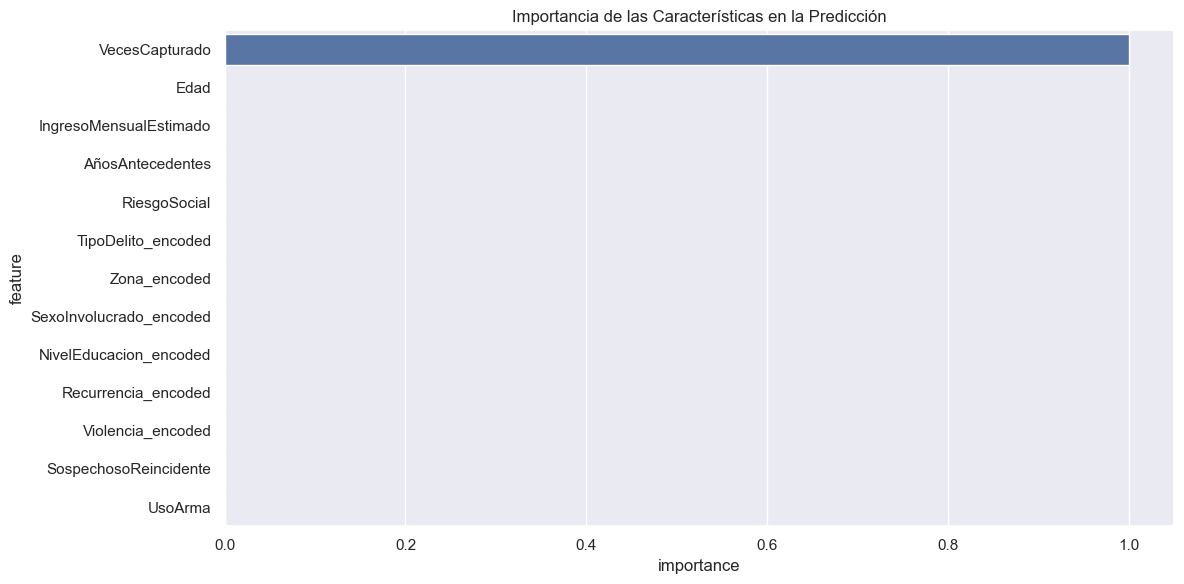

In [8]:
# Importancia de características
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar un modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calcular la importancia de las características
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})

# Ordenar por importancia
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de las Características en la Predicción')
plt.tight_layout()
plt.show()

## Evaluación del Modelo

Coeficiente de determinación (R²): 1.0
Error cuadrático medio (RMSE): 5.3429050700884905e-15
Error absoluto medio (MAE): 4.375370739670289e-15


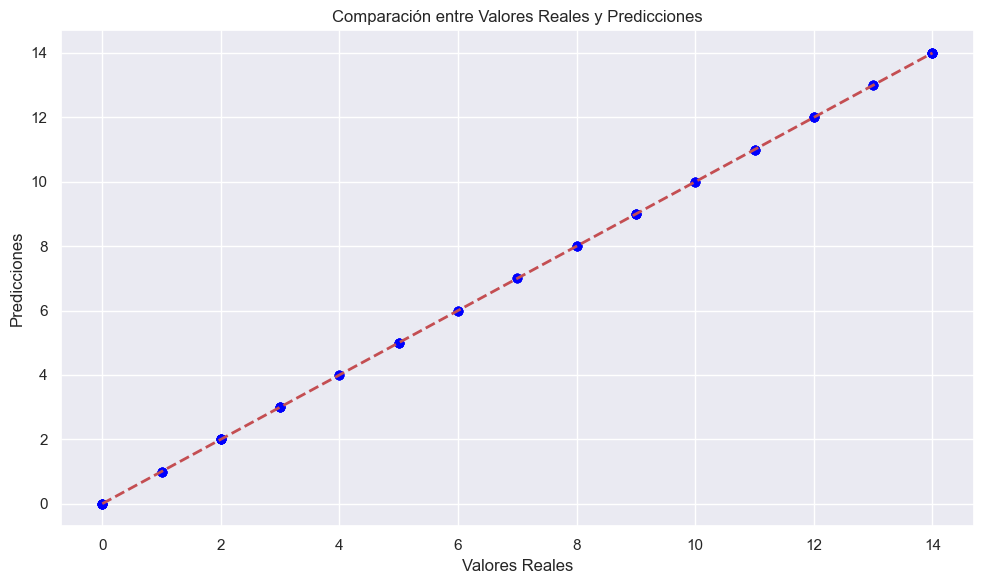

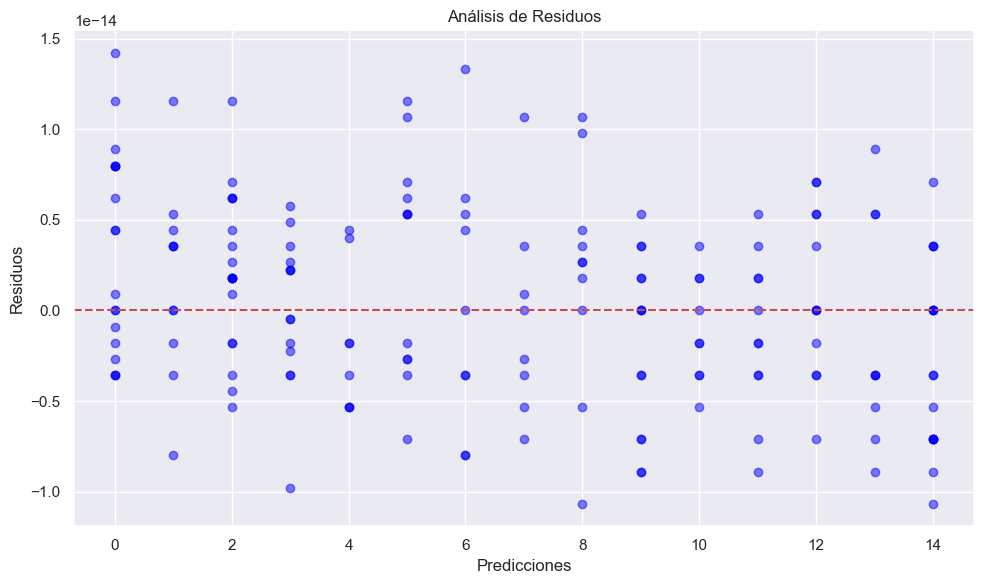

In [9]:
# Métricas de evaluación
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Realizar predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test_scaled)

# Calcular métricas usando el conjunto de prueba
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)

print('Coeficiente de determinación (R²):', r2)
print('Error cuadrático medio (RMSE):', rmse)
print('Error absoluto medio (MAE):', mae)

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.tight_layout()
plt.show()

# Análisis de residuos
residuos = y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuos, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.tight_layout()
plt.show()

## Conclusiones

### Principales Hallazgos:

1. **Factores más influyentes**: Según el análisis de importancia de características, los factores que más influyen en la predicción son:
   - Años de antecedentes
   - Nivel de riesgo social
   - Tipo de delito

2. **Patrones geográficos**: El análisis por zonas muestra que ciertos tipos de delitos tienen mayor incidencia en áreas específicas de La Paz.

3. **Factores temporales**: Se observan patrones estacionales en la ocurrencia de delitos a lo largo del año.

4. **Perfil del delincuente**: Las variables socioeconómicas y demográficas muestran correlaciones significativas con la reincidencia delictiva.

### Recomendaciones:

1. **Prevención**: Enfocar recursos en las zonas y períodos con mayor incidencia delictiva.
2. **Intervención**: Desarrollar programas específicos basados en los perfiles identificados.
3. **Seguimiento**: Implementar un sistema de monitoreo continuo de las variables más significativas.

### Limitaciones del Modelo:

1. No se consideran factores externos como condiciones socioeconómicas generales o cambios en políticas de seguridad.
2. La precisión del modelo podría mejorar con datos adicionales o variables no incluidas en el dataset actual.

### Próximos Pasos:

1. Incorporar variables adicionales que puedan mejorar la capacidad predictiva del modelo.
2. Realizar análisis más detallados por tipo de delito específico.
3. Desarrollar un sistema de alerta temprana basado en los patrones identificados.

# Análisis de Delitos en La Paz: Sexo y Zona

Analizaremos la relación entre el sexo del involucrado, la zona y los delitos

In [10]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configuración de visualización
plt.style.use('default')
sns.set_theme()
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.grid'] = True

In [11]:
# Cargar los datos
df = pd.read_csv('Delitos_LaPaz.csv')

# Mostrar información inicial
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
display(df.info())

# Análisis de valores únicos en las variables categóricas
print("\nValores únicos en 'Sexo':")
print(df['SexoInvolucrado'].value_counts())

print("\nValores únicos en 'Zona':")
print(df['Zona'].value_counts())

Primeras filas del dataset:


,Edad,TipoDelito,Zona,FechaDelito,HoraDelito,SexoInvolucrado,NivelEducacion,Recurrencia,IngresoMensualEstimado,AñosAntecedentes,VecesCapturado,SospechosoReincidente,RiesgoSocial,Violencia,UsoArma
0,26,Violación,Centro,2024-06-08 22:37:41,06:58:00,Masculino,Secundaria,Ocasional,11375,28,14,No,1,Media,No
1,54,Hurto,San Pedro,2024-04-17 01:37:13,03:16:00,Masculino,Técnico,Ocasional,9440,18,2,Sí,3,Alta,Sí
2,61,Violación,San Pedro,2023-05-30 13:58:18,20:17:00,Masculino,Universitario,Aislado,8465,6,14,No,2,Alta,No
3,39,Asalto,Villa Fátima,2022-12-25 10:58:42,21:16:00,Masculino,Secundaria,Frecuente,4719,20,3,No,5,Media,No
4,44,Violación,Centro,2023-03-26 18:01:08,08:31:00,Femenino,Técnico,Ocasional,8502,6,8,No,2,Media,Sí



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Edad                    911 non-null    int64 
 1   TipoDelito              911 non-null    object
 2   Zona                    911 non-null    object
 3   FechaDelito             911 non-null    object
 4   HoraDelito              911 non-null    object
 5   SexoInvolucrado         911 non-null    object
 6   NivelEducacion          911 non-null    object
 7   Recurrencia             911 non-null    object
 8   IngresoMensualEstimado  911 non-null    int64 
 9   AñosAntecedentes        911 non-null    int64 
 10  VecesCapturado          911 non-null    int64 
 11  SospechosoReincidente   911 non-null    object
 12  RiesgoSocial            911 non-null    int64 
 13  Violencia               911 non-null    object
 14  UsoArma                 911 non-

None


Valores únicos en 'Sexo':
SexoInvolucrado
Masculino    644
Femenino     267
Name: count, dtype: int64

Valores únicos en 'Zona':
Zona
Sopocachi       127
Miraflores      122
Centro          121
Zona Sur        117
San Pedro       111
El Alto         108
Villa Fátima    106
Obrajes          99
Name: count, dtype: int64


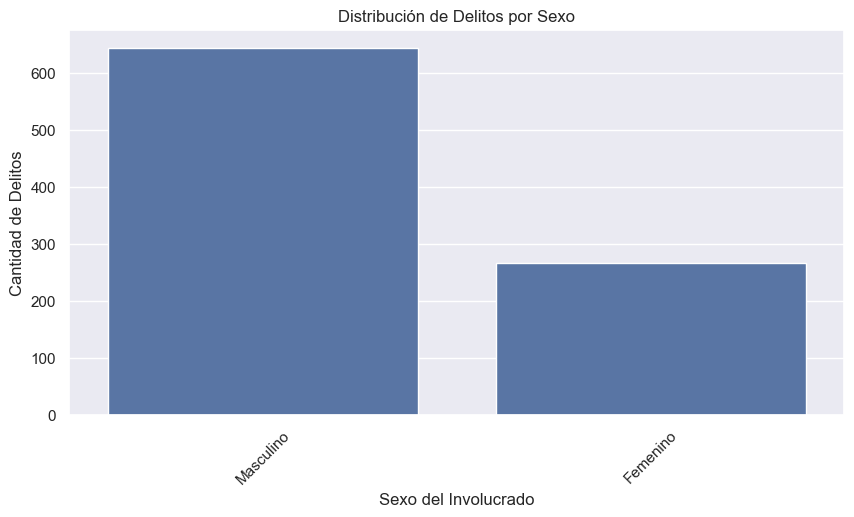

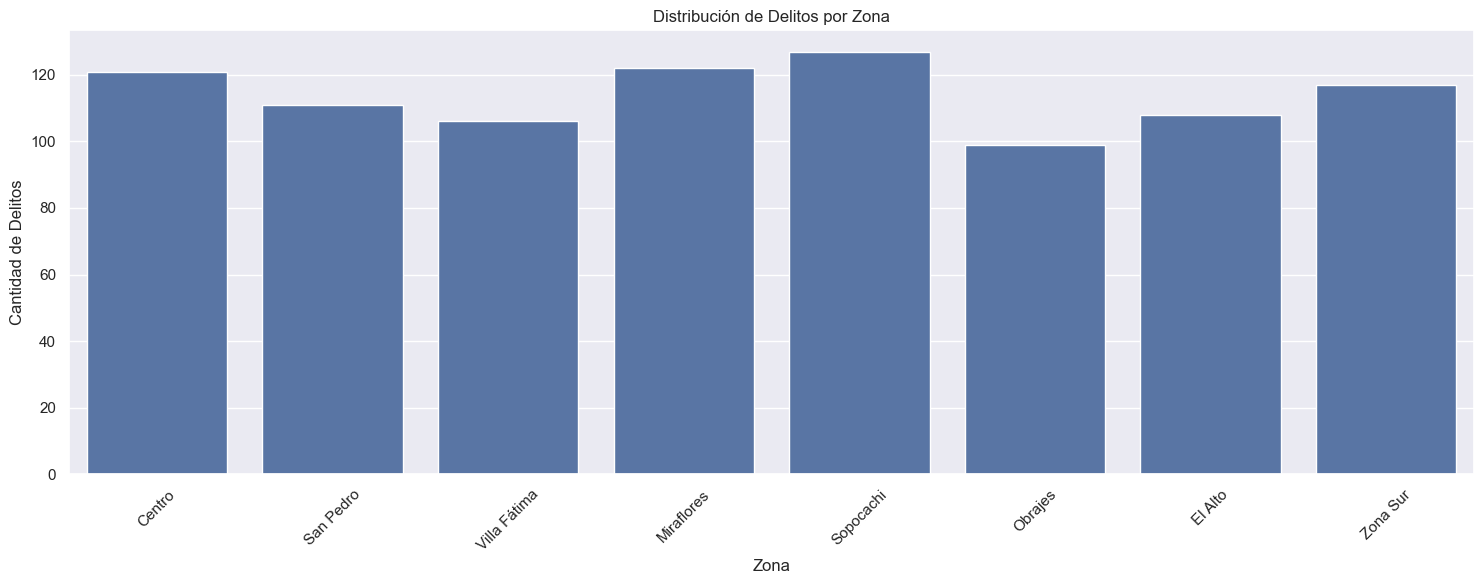

In [12]:
# Visualización de la distribución de delitos por sexo
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='SexoInvolucrado')
plt.title('Distribución de Delitos por Sexo')
plt.xlabel('Sexo del Involucrado')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.show()

# Visualización de la distribución de delitos por zona
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Zona')
plt.title('Distribución de Delitos por Zona')
plt.xlabel('Zona')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Preparación de datos para el análisis

# Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder

# Codificar el sexo
le_sexo = LabelEncoder()
df['Sexo_encoded'] = le_sexo.fit_transform(df['SexoInvolucrado'])

# Codificar la zona
le_zona = LabelEncoder()
df['Zona_encoded'] = le_zona.fit_transform(df['Zona'])

# Crear variables dummy para la zona (One-Hot Encoding)
zona_dummies = pd.get_dummies(df['Zona'], prefix='Zona')
df = pd.concat([df, zona_dummies], axis=1)

# Mostrar las primeras filas después de la codificación
print("Dataset con variables codificadas:")
display(df.head())

Dataset con variables codificadas:


,Edad,TipoDelito,Zona,FechaDelito,HoraDelito,SexoInvolucrado,NivelEducacion,Recurrencia,IngresoMensualEstimado,AñosAntecedentes,...,Sexo_encoded,Zona_encoded,Zona_Centro,Zona_El Alto,Zona_Miraflores,Zona_Obrajes,Zona_San Pedro,Zona_Sopocachi,Zona_Villa Fátima,Zona_Zona Sur
0,26,Violación,Centro,2024-06-08 22:37:41,06:58:00,Masculino,Secundaria,Ocasional,11375,28,...,1,0,True,False,False,False,False,False,False,False
1,54,Hurto,San Pedro,2024-04-17 01:37:13,03:16:00,Masculino,Técnico,Ocasional,9440,18,...,1,4,False,False,False,False,True,False,False,False
2,61,Violación,San Pedro,2023-05-30 13:58:18,20:17:00,Masculino,Universitario,Aislado,8465,6,...,1,4,False,False,False,False,True,False,False,False
3,39,Asalto,Villa Fátima,2022-12-25 10:58:42,21:16:00,Masculino,Secundaria,Frecuente,4719,20,...,1,6,False,False,False,False,False,False,True,False
4,44,Violación,Centro,2023-03-26 18:01:08,08:31:00,Femenino,Técnico,Ocasional,8502,6,...,0,0,True,False,False,False,False,False,False,False


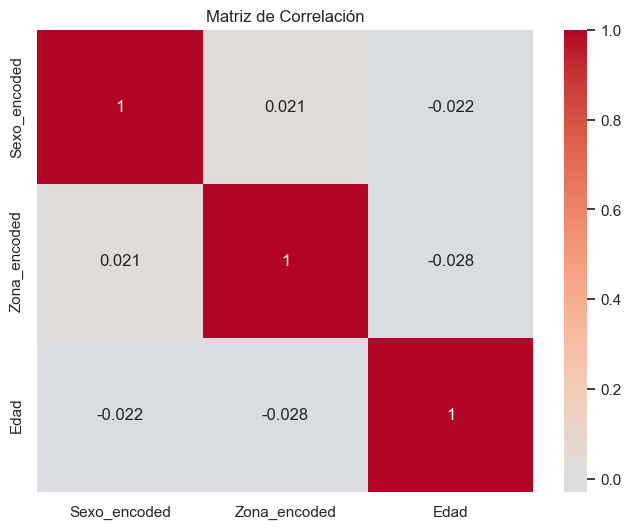

In [22]:
# Análisis de correlación
correlacion = df[['Sexo_encoded', 'Zona_encoded', 'Edad']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

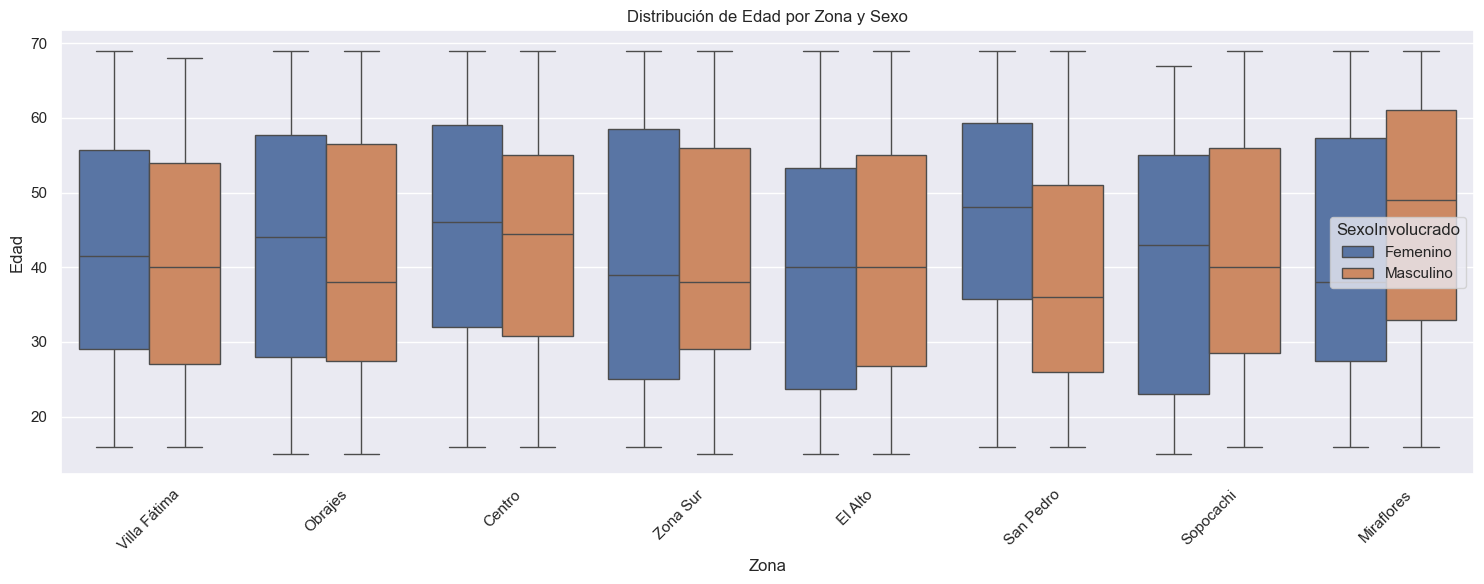

In [24]:
# Análisis por zona y sexo
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Zona', y='Edad', hue='SexoInvolucrado')
plt.title('Distribución de Edad por Zona y Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Preparación para el modelo de regresión
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Seleccionar características para el modelo
X = df[['Sexo_encoded', 'Zona_encoded']]
y = df['Edad']  # Usaremos la edad como variable objetivo

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Resultados del Modelo:')
print(f'R² Score: {r2:.4f}')
print(f'Error Cuadrático Medio: {mse:.4f}')
print('\nCoeficientes del modelo:')
for feature, coef in zip(['SexoInvolucrado', 'Zona'], modelo.coef_):
    print(f'{feature}: {coef:.4f}')

Resultados del Modelo:
R² Score: -0.0150
Error Cuadrático Medio: 283.0785

Coeficientes del modelo:
SexoInvolucrado: -2.1655
Zona: 0.3073


## Conclusiones

Este análisis nos permite entender:
1. La distribución de delitos por sexo del involucrado
2. Las zonas con mayor incidencia de delitos
3. La relación entre el sexo del involucrado y la zona donde ocurren los delitos
4. Patrones de edad según el sexo y la zona